# Домашнее задание «Визуализация данных»

Вам необходимо провести базовый EDA выбранного набора данных.

Требования к анализу:

построить не менее 4 визуализаций различных видов;
каждая визуализация должным образом оформлена и читается даже в отрыве от контекста;
по каждой визуализации необходимо написать вывод (какую гипотезу на ее основе можно выдвинуть?).

In [1]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#увеличим дефолтный размер графиков

from pylab import rcParams
rcParams['figure.figsize'] = 20,9

In [3]:
world_happiness = pd.read_csv('2019.csv')

In [4]:
world_happiness.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [5]:
world_happiness.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


In [6]:
world_happiness.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Overall rank                  156 non-null    int64  
 1   Country or region             156 non-null    object 
 2   Score                         156 non-null    float64
 3   GDP per capita                156 non-null    float64
 4   Social support                156 non-null    float64
 5   Healthy life expectancy       156 non-null    float64
 6   Freedom to make life choices  156 non-null    float64
 7   Generosity                    156 non-null    float64
 8   Perceptions of corruption     156 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 11.1+ KB


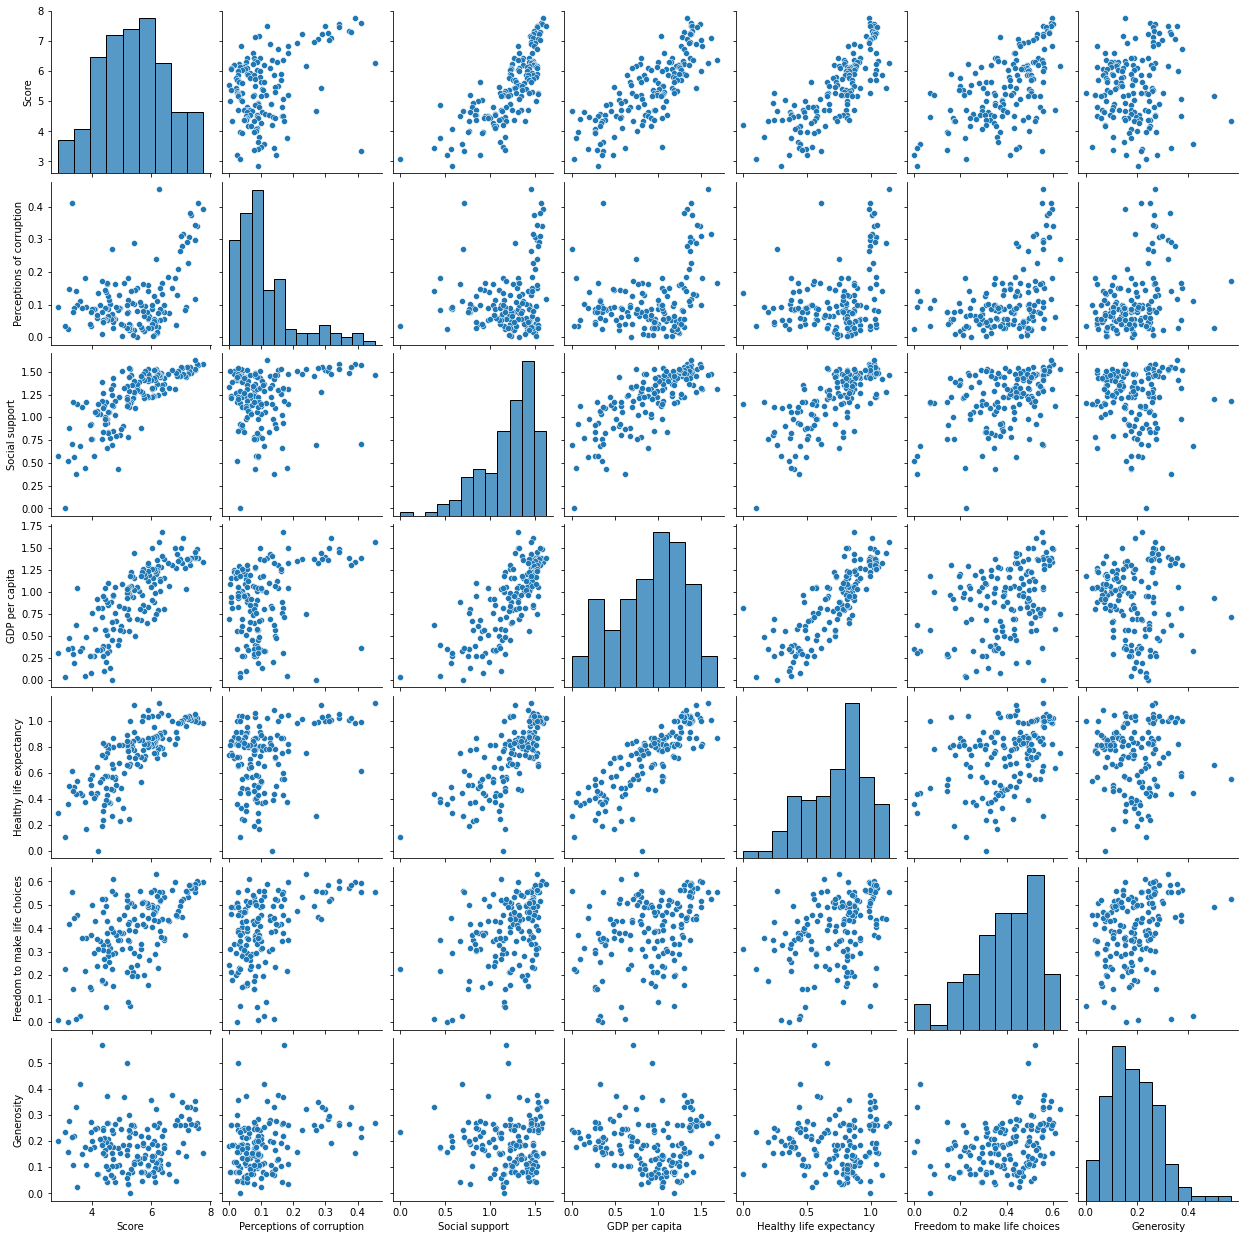

In [7]:
sns.pairplot(world_happiness[['Score', 'Perceptions of corruption', 'Social support','GDP per capita','Healthy life expectancy','Freedom to make life choices','Generosity']])

Text(0.5, 1.0, 'Распределение оценок по их количеству')

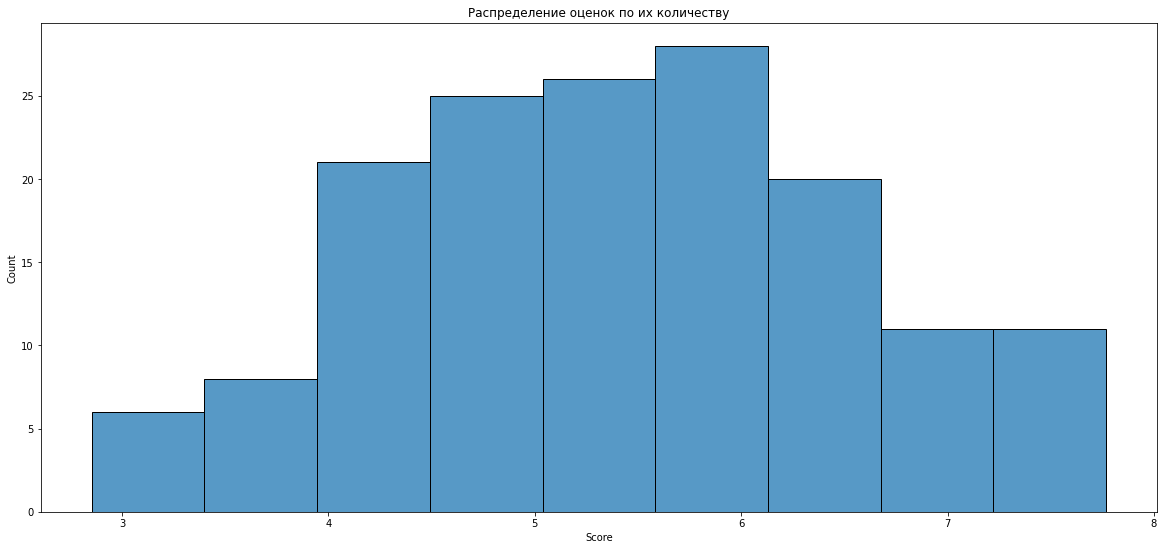

In [8]:
sns.histplot(world_happiness['Score'])
plt.title('Распределение оценок по их количеству')

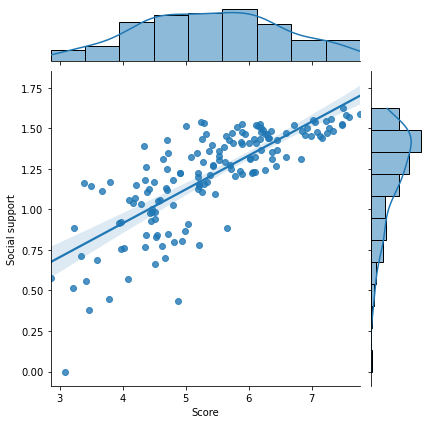

In [9]:
# Видим логичныый вывод о том что чем выше общая оценка Страны/Региона, тем лучше показатель социальной поддержки

sns.jointplot(x='Score', y='Social support', data=world_happiness, kind='reg')

In [10]:
without_country = world_happiness[['Perceptions of corruption', 'Social support','GDP per capita','Healthy life expectancy','Freedom to make life choices','Generosity']]

<AxesSubplot:>

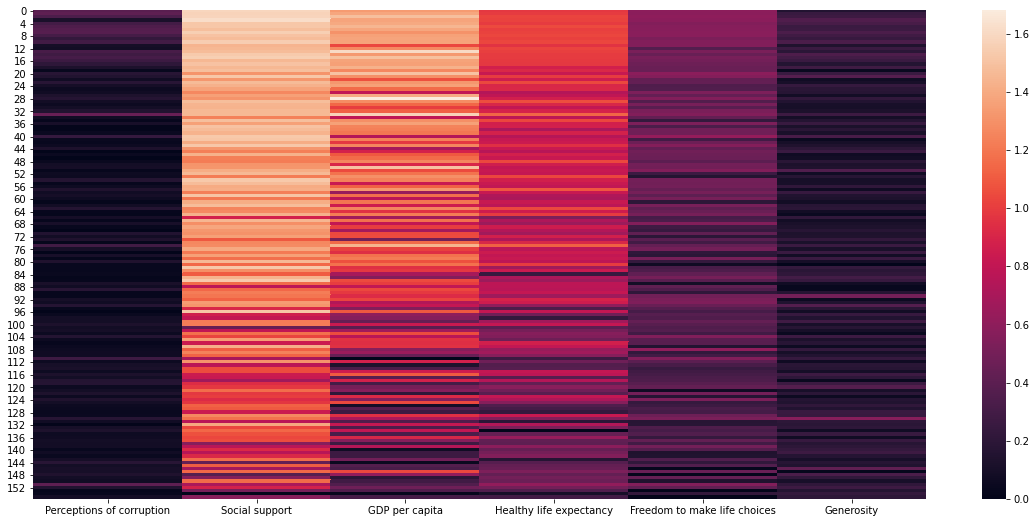

In [11]:
# На данной тепловой карте можно разгледеть что лучшие оценки ставили за социальную поддержку

sns.heatmap(without_country)

In [12]:
without_countries = world_happiness.drop('Country or region', axis=1)

In [13]:
without_countries_rank = without_countries.drop('Overall rank', axis=1)

<AxesSubplot:title={'center':'Динамика расставление оценок'}, xlabel='Оценка', ylabel='Номер оценки'>

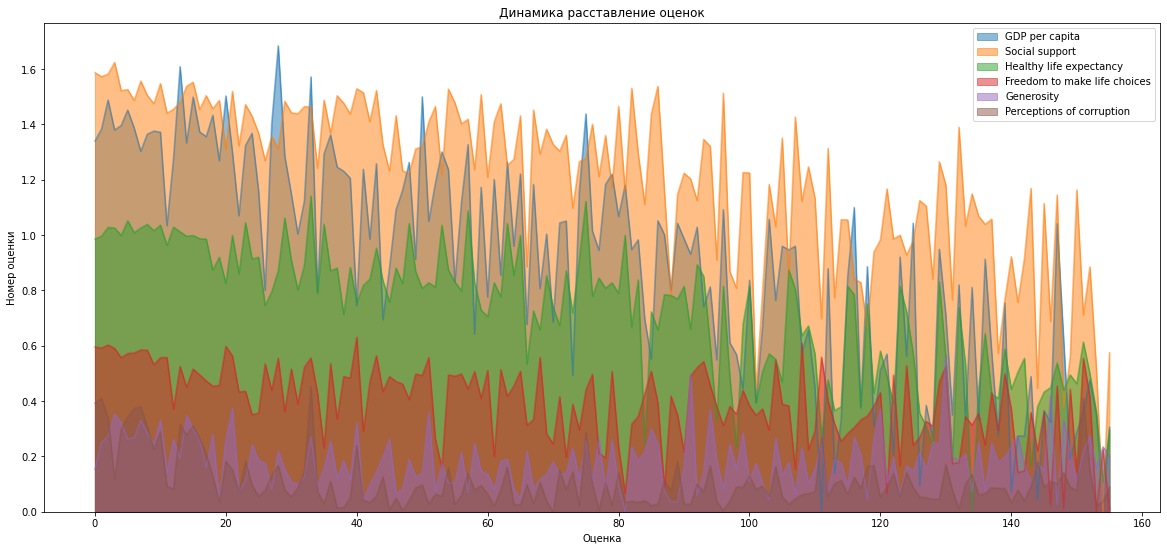

In [14]:
# по-умолчанию  Area chart всегда накопительный
without_countries_rank.drop('Score', axis=1).plot(kind='area',
                             title='Динамика расставление оценок', 
                             xlabel='Оценка', 
                                stacked=False,
                             ylabel='Номер оценки')


In [15]:
# Информация о топ 10 стран с высшей оценкой

top_country_df = world_happiness.groupby('Country or region')[['Score']].sum()\
    .sort_values('Score', ascending=False).head(10)
    
top_country_df

,Score
Country or region,
Finland,7.769
Denmark,7.600
Norway,7.554
Iceland,7.494
Netherlands,7.488
Switzerland,7.480
Sweden,7.343
New Zealand,7.307
Canada,7.278
